In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [2]:
# Load the genomic dataset (replace 'genomic_data.csv' with your dataset path)
data = pd.read_csv("D:\BE\BIF\datasets\Genomics.csv")

In [3]:
# Preview the dataset
data.head()

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg
0,01-01-2021,California,State,Alpha,1,1.69,NaN,NaN
1,01-01-2021,California,State,Lambda,0,0.00,NaN,NaN
2,01-01-2021,California,State,Other,29,49.15,NaN,NaN
3,01-01-2021,California,State,Epsilon,28,47.46,NaN,NaN
4,01-01-2021,California,State,Omicron,1,1.69,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               7790 non-null   object 
 1   area               7790 non-null   object 
 2   area_type          7790 non-null   object 
 3   variant_name       7790 non-null   object 
 4   specimens          7790 non-null   int64  
 5   percentage         7790 non-null   float64
 6   specimens_7d_avg   7730 non-null   float64
 7   percentage_7d_avg  7730 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 487.0+ KB


In [6]:
"""<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               7790 non-null   object 
 1   area               7790 non-null   object 
 2   area_type          7790 non-null   object 
 3   variant_name       7790 non-null   object 
 4   specimens          7790 non-null   int64  
 5   percentage         7790 non-null   float64
 6   specimens_7d_avg   7730 non-null   float64
 7   percentage_7d_avg  7730 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 487.0+ KB"""

"<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 7790 entries, 0 to 7789\nData columns (total 8 columns):\n #   Column             Non-Null Count  Dtype  \n---  ------             --------------  -----  \n 0   date               7790 non-null   object \n 1   area               7790 non-null   object \n 2   area_type          7790 non-null   object \n 3   variant_name       7790 non-null   object \n 4   specimens          7790 non-null   int64  \n 5   percentage         7790 non-null   float64\n 6   specimens_7d_avg   7730 non-null   float64\n 7   percentage_7d_avg  7730 non-null   float64\ndtypes: float64(3), int64(1), object(4)\nmemory usage: 487.0+ KB"

In [7]:
# Imputing missing values using the mean strategy for numeric columns
imputer = SimpleImputer(strategy='mean')
data[['specimens_7d_avg', 'percentage_7d_avg']] = imputer.fit_transform(data[['specimens_7d_avg', 'percentage_7d_avg']])

In [8]:
label_encoder = LabelEncoder()
data['variant_label'] = label_encoder.fit_transform(data['variant_name'])

In [9]:
# Features (X) and target (y)
X = data[['specimens', 'percentage', 'specimens_7d_avg', 'percentage_7d_avg']].values
y = data['variant_label'].values

In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Creating a pipeline with scaling and SVM classifier
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [12]:
# Making predictions using the SVM model
y_pred_svm = pipeline.predict(X_test)

In [13]:
# Adjusting target names based on the unique classes in the test set
unique_labels = np.unique(y_test)
target_names = [label_encoder.inverse_transform([i])[0] for i in unique_labels]

In [14]:
# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, target_names=target_names)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Displaying the accuracy and classification report for the SVM model
print(f"Accuracy (SVM): {accuracy_svm:.2f}")
print("Classification Report (SVM):")
print(classification_rep_svm)

Accuracy (SVM): 0.24
Classification Report (SVM):
              precision    recall  f1-score   support

       Alpha       0.85      0.10      0.17       229
        Beta       0.00      0.00      0.00       240
       Delta       0.50      0.02      0.04       216
     Epsilon       0.68      0.07      0.12       249
       Gamma       0.31      0.07      0.12       254
      Lambda       0.13      0.99      0.23       227
          Mu       0.00      0.00      0.00       232
     Omicron       0.00      0.00      0.00       232
       Other       0.40      0.20      0.27       230
       Total       0.58      0.99      0.73       228

    accuracy                           0.24      2337
   macro avg       0.34      0.24      0.17      2337
weighted avg       0.34      0.24      0.17      2337



In [16]:
# Initializing and training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = rf_classifier.predict(X_test)

In [18]:
unique_labels = np.unique(y_test)
target_names = [label_encoder.inverse_transform([i])[0] for i in unique_labels]

In [19]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

In [20]:
# Displaying the accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

       Alpha       0.62      0.21      0.31       229
        Beta       0.17      0.85      0.28       240
       Delta       0.58      0.32      0.41       216
     Epsilon       0.54      0.15      0.24       249
       Gamma       0.42      0.13      0.19       254
      Lambda       0.29      0.07      0.12       227
          Mu       0.33      0.09      0.14       232
     Omicron       0.73      0.55      0.63       232
       Other       0.68      0.81      0.74       230
       Total       1.00      1.00      1.00       228

    accuracy                           0.42      2337
   macro avg       0.54      0.42      0.41      2337
weighted avg       0.53      0.42      0.40      2337



In [21]:
# Initializing and training the Support Vector Classifier (SVM)
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Making predictions using the SVM model
y_pred_svm = svm_classifier.predict(X_test)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, target_names=target_names)

# Displaying the accuracy and classification report for the SVM model
print(f"Accuracy (SVM): {accuracy_svm:.2f}")
print("Classification Report (SVM):")
print(classification_rep_svm)

Accuracy (SVM): 0.21
Classification Report (SVM):
              precision    recall  f1-score   support

       Alpha       0.32      0.07      0.11       229
        Beta       0.00      0.00      0.00       240
       Delta       0.00      0.00      0.00       216
     Epsilon       0.64      0.03      0.05       249
       Gamma       0.00      0.00      0.00       254
      Lambda       0.13      1.00      0.22       227
          Mu       0.00      0.00      0.00       232
     Omicron       0.00      0.00      0.00       232
       Other       0.25      0.09      0.13       230
       Total       0.55      0.98      0.71       228

    accuracy                           0.21      2337
   macro avg       0.19      0.22      0.12      2337
weighted avg       0.19      0.21      0.12      2337



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 864x432 with 0 Axes>

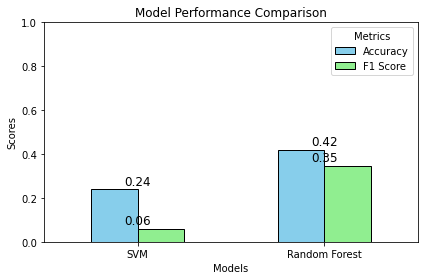

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['SVM', 'Random Forest']
accuracy_scores = [0.24, 0.42]  
f1_scores = [
    (0.12 + 0.00 + 0.00 + 0.06 + 0.00 + 0.22 + 0.00 + 0.00 + 0.13) / 9,  # Average F1 for SVM
    (0.33 + 0.29 + 0.43 + 0.21 + 0.19 + 0.12 + 0.15 + 0.64 + 0.75) / 9  # Average F1 for RF
]


performance_data = {
    'Model': models,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores
}

performance_df = pd.DataFrame(performance_data)

plt.figure(figsize=(12, 6))

performance_df.set_index('Model').plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')


plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.ylim(0, 1)

for i in range(len(performance_df)):
    plt.text(i, performance_df['Accuracy'][i] + 0.02, round(performance_df['Accuracy'][i], 2), ha='center', fontsize=12)
    plt.text(i, performance_df['F1 Score'][i] + 0.02, round(performance_df['F1 Score'][i], 2), ha='center', fontsize=12)

#plot
plt.tight_layout()
plt.legend(title='Metrics')
plt.show()
